<a href="https://colab.research.google.com/github/SCHMIDDY7212/Projects/blob/main/GARCH_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GARCH Models**


**What is a GARCH Model?**

 The Generalized Autoregressive Conditional Heteroskedasticity (GARCH) model is a statistical model used to analyze and forecast time series data. It was created by Robert F. Engle in 1982. It is an extention of the ARCH model. It was created to model financial econometrics.

**When do we use a GARCH Model?**

GARCH models are used to model data that is highly volatile. The GARCH model aims to estimate the variance of the error terms in a time series. This is particularly useful when measuring econometrics like currency values or stock prices. These things can have huge positive and negative swings that are sparce and difficult to predict using the ARCH model.

# **Mathematical Descriptions**

These are both modeling the simplest form

## **ARCH(1) Model:**

\begin{equation}
    \sigma_t^2 = \omega + \alpha \varepsilon_{t-1}^2\\
    Y_t = \mu + \epsilon_t
\end{equation}

Here,
\begin{align*}
    &\sigma_t^2 \text{ is the conditional variance at time } t, \\
    &\omega \text{ is the constant term,} \\
    &\alpha \text{ is the coefficient of the lagged squared error term, and} \\
    &\varepsilon_{t-1}^2 \text{ is the squared error at time } t-1.
\end{align*}

## **GARCH(1,1) Model:**

\begin{equation}
    \sigma_t^2 = \omega + \alpha \varepsilon_{t-1}^2 + \beta \sigma_{t-1}^2    \\
    Y_t = \mu + \epsilon_t
\end{equation}

Here,
\begin{align*}
    &\sigma_t^2 \text{ is the conditional variance at time } t, \\
    &\omega \text{ is the constant term,} \\
    &\alpha \text{ is the coefficient of the lagged squared error term,} \\
    &\varepsilon_{t-1}^2 \text{ is the squared error at time } t-1, \\
    &\beta \text{ is the coefficient of the lagged conditional variance term, and} \\
    &\sigma_{t-1}^2 \text{ is the conditional variance at time } t-1.
\end{align*}




## **Key Differences:**

Both of these models utilize the same mean equation. The difference between them is the volatility equation. Both of them have a constant as well as a term that depends on the previous random error term. The difference in the GARCH model is that the estimate for volatility includes a term that depends on the previous measures of volatility. This allows the GARCH model to more accurately describe financial data that is very volatile. Without this term, the ARCH model is very "Bursty". This means that while it does have large jumps that a volatile time series would have, those large jumps are usually followed by a quick reversion to the mean. This is not how financial data usually behaves. Financial data typically has large jumps, followed by stable periods. The Garch model allows for these large jumps while also modeling these stable periods. This is because of the added term the GARCH model uses when calculating volatility. For that reason, the GARCH model is much better than the ARCH model at modeling financial econometrics so much so, that the arch model is rarely ever used.


## **Implementation:**

To show how the GARCH model works I wrote the function below. This fucntion can be used to fit both the GARCH and ARCH (and other models of this family) models on any stock in Yahoo Finanace. The code is documented for interperitability.

In [ ]:
!pip install pandas numpy arch yfinance # install required packages


In [ ]:
import pandas as pd # for data processing
import numpy as np # for fast list operations
import arch # base impelmentaiton of ARCH and GARCH
import yfinance as yf # download data from yahoo finance
from matplotlib import pyplot as plt # for plotting data

def predict_stock(ticker, model_type='GARCH'):
    # Download the stock data
    data = yf.download(ticker, start="2010-01-01", end="2023-12-13")
    # Convert to percentage change and remove NA values
    cleaned_data = 100*data["Adj Close"].pct_change().dropna()
    # Fit a GARCH model to the data
    model = arch.arch_model(cleaned_data, vol=model_type)
    # itterateively fit the model for optimal parameters
    model = model.fit(disp="off")
    #print out summary of model fit
    print(model.summary())
    look_window = 3
    # Forecast the next n days of performance
    forecast = model.forecast(horizon=look_window, method='simulation')

    # Print the forecast
    print(f"The forecasted performance for the next {look_window} days is:")
    print(f'mean of the {look_window} day forcast:', forecast.mean, sep='\n')
    print(f'volatility of the {look_window} day forcast:', forecast.variance, sep='\n')

    # Get the residuals from the model
    residuals = model.resid

    # Plot the residuals
    plt.plot(residuals)
    plt.xlabel("Date")
    plt.ylabel("Residuals")
    plt.show()


## **Experimental Design**

The four assets that I chose to test the models on were GC=F (GOLD), SPY (S&P500 indicator), TSLA stock, and BTC-USD (Bitcoin). I choose to do Gold because it is a relatively stable asset compared to stocks. I choose to do SPY because it is an indicator and therefore is relatively stable compared to individual stocks. I chose TSLA because it is a relatively volitile stock within its sector. I chose Bitcoin because cryptocurrencies are incredibly volitile and bitcoin has a large market volume. These four choices gave me four different datasets with different levels of volatility.

[*********************100%%**********************]  1 of 1 completed
                      Constant Mean - ARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -4971.97
Distribution:                  Normal   AIC:                           9949.94
Method:            Maximum Likelihood   BIC:                           9968.43
                                        No. Observations:                 3509
Date:                Thu, Dec 14 2023   Df Residuals:                     3508
Time:                        21:56:54   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
----------------------------------------------------------------------

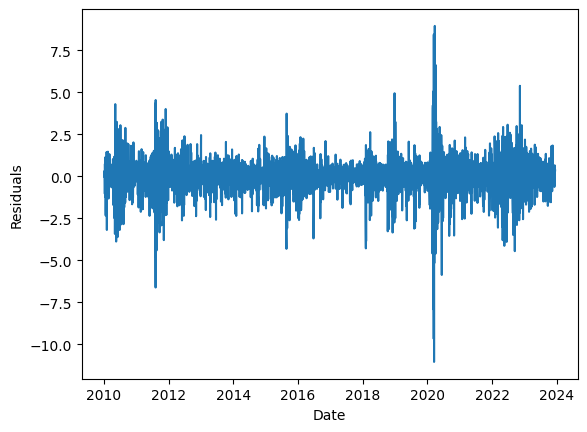

In [ ]:
predict_stock('SPY', 'ARCH')

[*********************100%%**********************]  1 of 1 completed
                     Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -4503.73
Distribution:                  Normal   AIC:                           9015.47
Method:            Maximum Likelihood   BIC:                           9040.12
                                        No. Observations:                 3509
Date:                Thu, Dec 14 2023   Df Residuals:                     3508
Time:                        21:56:54   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
----------------------------------------------------------------------

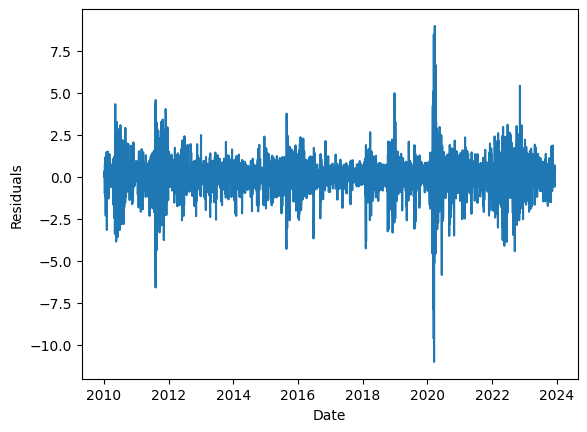

In [ ]:
predict_stock('SPY', 'GARCH')

[*********************100%%**********************]  1 of 1 completed
                      Constant Mean - ARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -9079.15
Distribution:                  Normal   AIC:                           18164.3
Method:            Maximum Likelihood   BIC:                           18182.7
                                        No. Observations:                 3387
Date:                Thu, Dec 14 2023   Df Residuals:                     3386
Time:                        21:56:55   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
----------------------------------------------------------------------

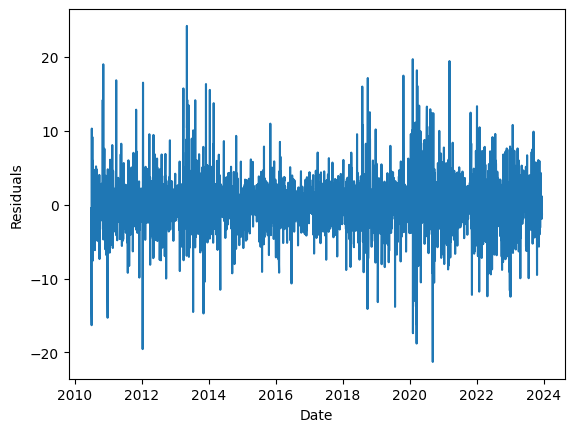

In [ ]:
predict_stock('TSLA', 'ARCH')

[*********************100%%**********************]  1 of 1 completed
                     Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -8945.07
Distribution:                  Normal   AIC:                           17898.1
Method:            Maximum Likelihood   BIC:                           17922.6
                                        No. Observations:                 3387
Date:                Thu, Dec 14 2023   Df Residuals:                     3386
Time:                        21:56:56   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
----------------------------------------------------------------------

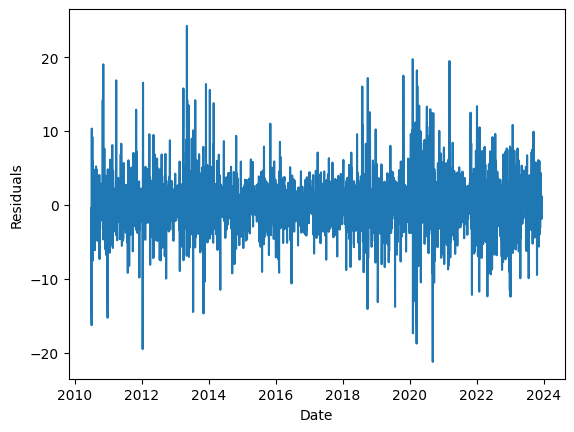

In [ ]:
predict_stock('TSLA', 'GARCH')

[*********************100%%**********************]  1 of 1 completed
                      Constant Mean - ARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -9116.46
Distribution:                  Normal   AIC:                           18238.9
Method:            Maximum Likelihood   BIC:                           18257.3
                                        No. Observations:                 3373
Date:                Thu, Dec 14 2023   Df Residuals:                     3372
Time:                        21:56:57   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
----------------------------------------------------------------------

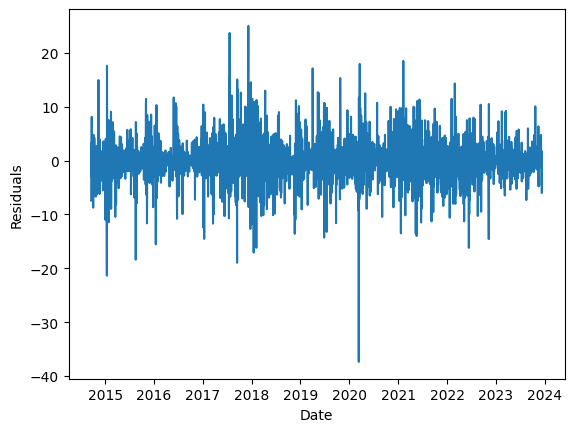

In [ ]:
predict_stock('BTC-USD', 'ARCH')

[*********************100%%**********************]  1 of 1 completed
                     Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -8910.06
Distribution:                  Normal   AIC:                           17828.1
Method:            Maximum Likelihood   BIC:                           17852.6
                                        No. Observations:                 3373
Date:                Thu, Dec 14 2023   Df Residuals:                     3372
Time:                        21:56:58   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
----------------------------------------------------------------------

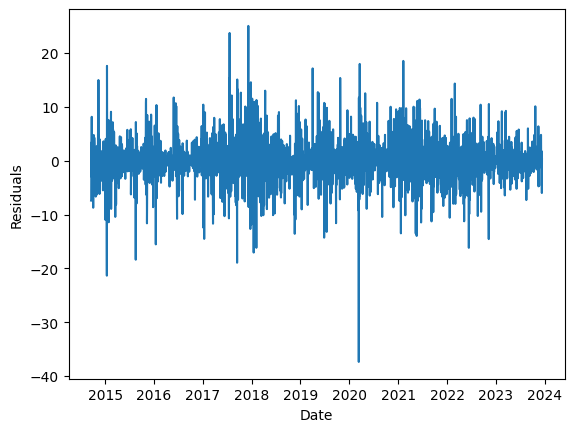

In [ ]:
predict_stock('BTC-USD', 'GARCH')

[*********************100%%**********************]  1 of 1 completed
                      Constant Mean - ARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -4969.68
Distribution:                  Normal   AIC:                           9945.35
Method:            Maximum Likelihood   BIC:                           9963.84
                                        No. Observations:                 3507
Date:                Thu, Dec 14 2023   Df Residuals:                     3506
Time:                        21:56:59   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
----------------------------------------------------------------

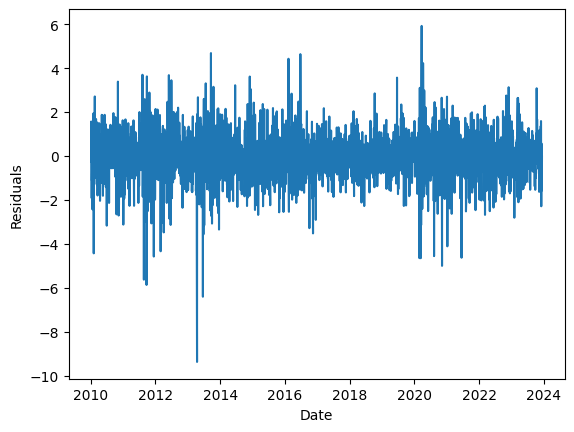

In [ ]:
predict_stock('GC=F', 'ARCH')

[*********************100%%**********************]  1 of 1 completed
                     Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -4828.04
Distribution:                  Normal   AIC:                           9664.07
Method:            Maximum Likelihood   BIC:                           9688.72
                                        No. Observations:                 3507
Date:                Thu, Dec 14 2023   Df Residuals:                     3506
Time:                        21:57:00   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
----------------------------------------------------------------

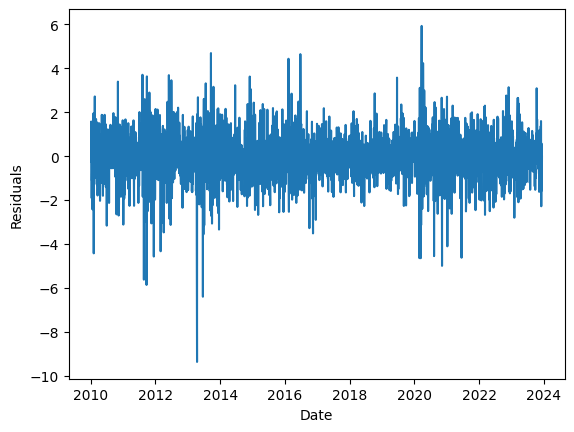

In [ ]:
predict_stock('GC=F', 'GARCH')

## **Conclusions:**

From the comparison of these three assets the GARCH model consistantly perfomrs better than the ARCH model at predicting the volatility of the asset. This is based on the fact that the Log-Likelyhood for the GARCH model was greater than the ARCH model and AIC and BIC for the GARCH model of each asset was lower than that of the ARCH model. This demonstrates that the GARCH model has superior performance in modeling highly volatile as well as less volatile data than the ARCH model.